In [1]:
import sys
from functools import reduce
from operator import add
import matplotlib.pyplot as plt

sys.path.append("..")
import swcgeom

print tree: Neuron Tree with 8 nodes and 7 edges
print node: 1 1 14.5661 34.8738 7.8570 0.7178 -1
1 1 14.5661 34.8738 7.8570 0.7178 -1
2 0 16.0225 33.7605 7.0470 0.4634 1
3 5 17.5420 32.6050 6.8850 0.6380 2
4 0 19.1640 32.0225 5.9130 0.6023 3
5 0 20.4481 30.8228 4.8600 0.4360 4
6 6 21.8979 28.8811 3.4020 0.4719 5
7 0 18.4620 30.2895 8.5860 0.4475 3
8 6 19.4208 28.7308 9.5580 0.4962 7
0 nodes enable flag
8 nodes enable flag
tips: 2


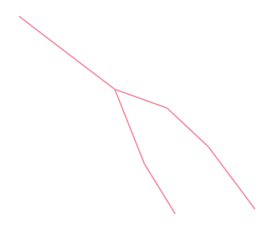

In [2]:
# create a tree
tree = swcgeom.Tree.from_swc("/data/trees/test.swc")

# print tree
print("print tree:", tree)
print("print node:", tree[1])
for a in tree: print(a)

# generate swc file
# tree.to_swc("./test.swc")

# set flag
def sum_flag(a: swcgeom.Tree.Node, children: list[int]) -> int:
    return sum(children) + (1 if "test_flag" in a.data else 0)

def set_flag(a: swcgeom.Tree.Node, _: None) -> None:
    a["test_flag"] = True

print("%s nodes enable flag"%tree.traverse(leave=sum_flag))
tree.traverse(enter=set_flag)
print("%s nodes enable flag"%tree.traverse(leave=sum_flag))

# collect tips
tips = tree.traverse(leave=lambda cur, children: max(1, reduce(add, children, 0)))
print(f"tips: {tips}")

# darw
tree.draw()

In [4]:
# normalize
tree = swcgeom.Tree.from_swc("/data/trees/test.swc")
tree.normalize()

print(tree.scale)
for a in tree: print(a)

(0.13639268, 0.16278651, 0.16244316, 3.548553)
1 1 0.0000 1.0000 0.7237 1.0000 -1
2 0 0.1986 0.8188 0.5921 0.0971 1
3 5 0.4059 0.6307 0.5658 0.7167 2
4 0 0.6271 0.5358 0.4079 0.5900 3
5 0 0.8023 0.3406 0.2368 0.0000 4
6 6 1.0000 0.0245 0.0000 0.1273 5
7 0 0.5314 0.2537 0.8421 0.0406 3
8 6 0.6621 0.0000 1.0000 0.2136 7


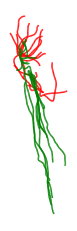

In [6]:
swc1 = "/data/trees/preprocess/070403-1mg.CNG.swc_sort.swc_three_prun.swc_tip_prun.swc_smooth_branch.swc_result.swc_finalsort.swc"
swc2 = "/data/trees/preprocess/070403-3cs.CNG.swc_sort.swc_three_prun.swc_tip_prun.swc_smooth_branch.swc_result.swc_finalsort.swc"

fig, ax = plt.subplots(1,1)
swcgeom.Tree.from_swc(swc1).draw(ax=ax, color="red")
swcgeom.Tree.from_swc(swc2).draw(ax=ax, color="green")
plt.show()

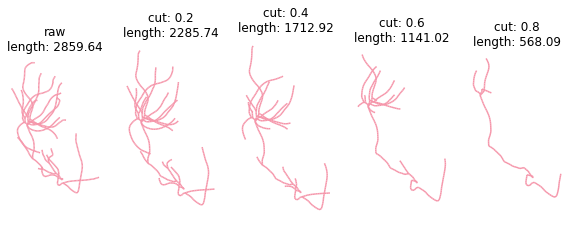

In [5]:
swc = "/data/trees/preprocess/070403-1mg.CNG.swc_sort.swc_three_prun.swc_tip_prun.swc_smooth_branch.swc_result.swc_finalsort.swc"

tree = swcgeom.Tree.from_swc(swc)

fig, axes = plt.subplots(1,5)
fig.set_size_inches(10, 20)
ax0 = axes[0] # type: ignore
ax0.set_title(f"raw\nlength: {tree.length():.2f}")
tree.draw(ax=ax0)
for i in range(1, 5):
    p = 0.2 * i
    t = tree.random_cut(1-p)
    ax = axes[i] # type: ignore
    ax.set_title(f"cut: {p:.1f}\nlength: {t.length():.2f}")
    t.draw(ax=ax)